In [14]:
import os

import numpy as np
import pandas as pd

import post_processing

In [15]:
# Parent folder containing folders for each object
path_predictions = os.path.join("..", "results", "predictions")

# Image to plot the binary masks for (the same image will be used for all objects)
reference_image = "100.png"

# Settings for mask dilation
margin_degrees = 0.5
viewing_distance = 62
monitor_width = 54.5
monitor_resolution_x = 1920

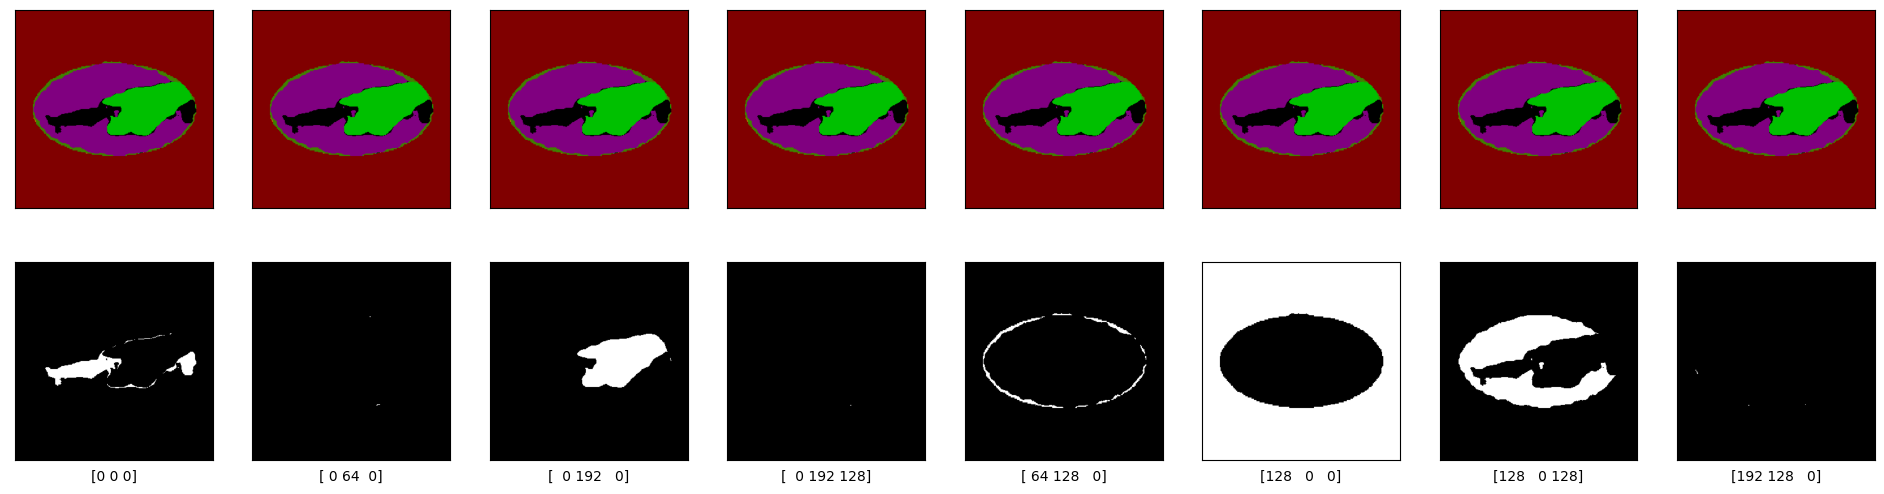

In [16]:
_ = post_processing.plot_binary_masks(path_to_mask=os.path.join(path_predictions, "knife", "cluster", reference_image))

In [17]:
target_colors_knife = [
    (0, 0, 0),
    (0, 192, 0),
]

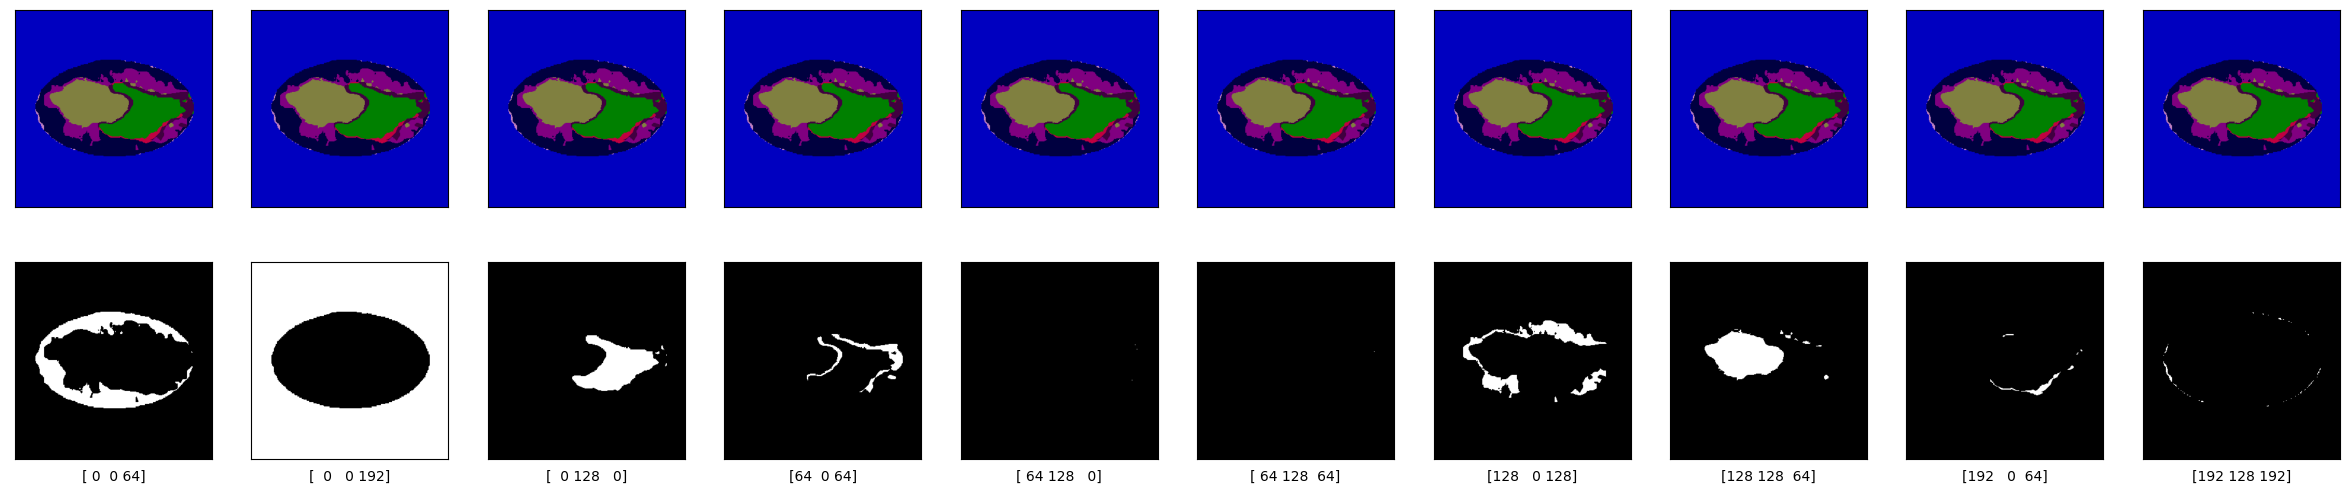

In [18]:
_ = post_processing.plot_binary_masks(path_to_mask=os.path.join(path_predictions, "water_bottle", "cluster", reference_image))

In [19]:
target_colors_water_bottle = [
    (0, 128, 0),
    (64, 0, 64),
    (128, 128, 64),
]

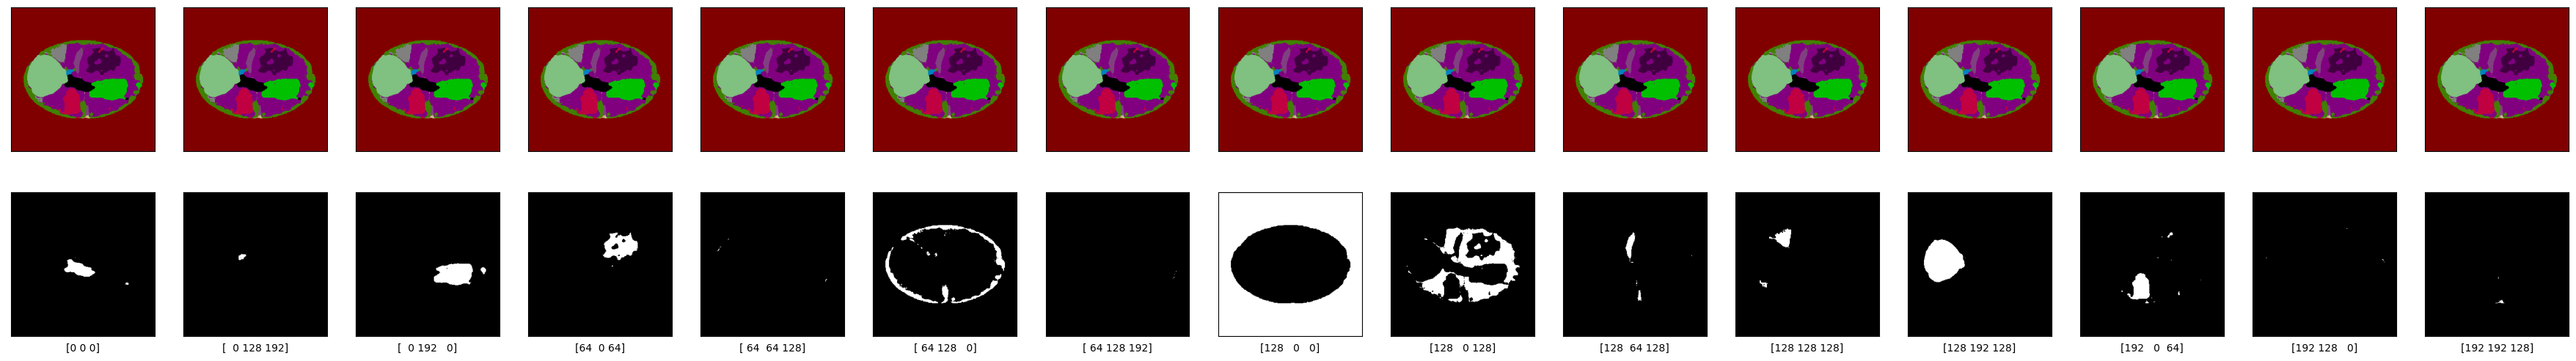

In [20]:
_ = post_processing.plot_binary_masks(path_to_mask=os.path.join(path_predictions, "plunger", "cluster", reference_image))

In [21]:
target_colors_plunger = [
    (0, 0, 0),
    (0, 192, 0),
    (128, 192, 128),
]

In [22]:
settings = pd.DataFrame(
    {
        "object_type": [
            "knife",
            "water_bottle",
            "plunger",
        ],
        "original_resolution": [
            168,
            184,
            232,
        ],
        "target_colors": [
            target_colors_knife,
            target_colors_water_bottle,
            target_colors_plunger,
        ],
        "close_kernel": [
            np.ones((11, 11), dtype="uint8"),
            np.ones((0, 0), dtype="uint8"),
            np.ones((4, 4), dtype="uint8"),
        ],
    }
)

In [23]:
for _, row in settings.iterrows():
    post_processing.process_masks(
        row_settings=row,
        path=path_predictions,
        margin_degrees = margin_degrees,
        viewing_distance = viewing_distance,
        monitor_width = monitor_width,
        monitor_resolution_x = monitor_resolution_x,
    )